In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Introduction 


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Demand forecasting is the basis for many managerial decisions, budgeting, production planning, inventory control, and human resource planning. There are many internal and external variables that may impact sales demand, such as advertisement, promotions, economic situation, competitor’s behaviour, weather, or special events. This project aims to forecast sales and allows store managers to obtain a great source of information for planning and decision making.
Our dataset contains historical data, including sales and stores information from 1,115 Rossmann stores. The dataset included several factors (e.g., promotions, competition, school and state holidays, seasonality, and locality) which may impact the store sales. We also noticed that some stores in the dataset were temporarily closed for refurbishment. In this report, the sales data will be wrangled and cleaned before we are able to use it in any analysis. In order to perform these tasks, evaluations will have to be made and justified. We hope that by analysing store, promotion, and competitor data, we can predict sales trends accurately. 


## Ethical Considerations

I first take action to protect the privacy and confidentiality of data, respect the ownership of proprietary data, and is not exposing data. Induration of processing data, no individual is allowed to access the data nor print out the data. Secondly, make sure data types or conversions are accrue during the process to achieve data integrity. Then, we need to make sure that all the reports and visualisations do not disclose specific data so that such reports and visualisations can not be used to identify information. Before publishing, the process of data analysis must be audited by a third party. To avoid potential harm to the origin, we need to review the process and follow guidelines. Improper data processing or analysis will result in false or misleading conclusions. Archiving and encrypting the original data after processing is the last step to avoid data leaks.

##  Variables Explanation 

*Variables in the store file:*

- Store - a unique Id for each store
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


*Variables in the train file:*

- Store - a unique Id for each store
- DayOfWeek - indicates the day of the week    
- Date - the exact date for the sales 
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- Promo - indicates whether a store is running a promo on that day
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools


*Dataset  info*
*stores document contains:*
- 1115 rows
- 10 columns(listed from 0 to 9)

*Train document contains:*
- 1017209 rows
- 9 columns(listed from 0 to 8)

*Data types: int64,object,float64 dtypes are used in both dataset*

## Data Exploration

*Input data into Jupyter Notebook*

In [2]:
store_sales = pd.read_csv("store.csv")
store_sales

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
store_sales_train = pd.read_csv('train.csv',low_memory=False)
store_sales_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


##### Summarises data using code: shape, data types, DataFrame info

In [4]:
store_sales.shape

(1115, 10)

In [5]:
store_sales_train.shape

(1017209, 9)

In [6]:
store_sales.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [7]:
store_sales_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


*Conclusion and Summary of the dataset*

*stores document contains:*
- 1115 rows
- 10 columns(listed from 0 to 9)

*train document contains:*
- 1017209 rows
- 9 columns(listed from 0 to 8)

Data types: int64,object,float64 dtypes are used in both dataset

### Wrangles data

##### Merging of data sources

In [10]:
# Merge two datasets

merged = store_sales.merge(store_sales_train, how='inner', on = "Store", validate = "one_to_many")
merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

##### Convert to datetime

In [12]:
# Convert date column to DateTime

merged["Date"] = pd.to_datetime(merged["Date"],errors="coerce",format ="%Y/%m/%d")
merged["Date"]

0         2015-07-31
1         2015-07-30
2         2015-07-29
3         2015-07-28
4         2015-07-27
             ...    
1017204   2013-01-05
1017205   2013-01-04
1017206   2013-01-03
1017207   2013-01-02
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

##### Add colums

In [13]:
# Add day/month/year columns for filtering and visualising

merged.copy()
merged["day"] = merged["Date"].dt.day
merged["month"] = merged["Date"].dt.month
merged["year"] = merged["Date"].dt.year
merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,27,7,2015


### Cleans data

##### Detect missing values

In [14]:
# Identify missing values.

nan_merged = merged[merged.isna()]
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Summarising missing values

nan_merged = merged.isna().sum()
nan_merged

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
day                               0
month                             0
year                              0
dtype: int64

In [16]:
# Filter missing values

nan_merged = merged[(merged["CompetitionDistance"].isna()) 
                             & (merged["CompetitionOpenSinceMonth"].isna())
                            &(merged["CompetitionOpenSinceYear"].isna())]
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
263244,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,...,2015-07-31,10052,973,1,1,0,1,31,7,2015
263245,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,...,2015-07-30,9030,883,1,1,0,1,30,7,2015
263246,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,...,2015-07-29,8204,814,1,1,0,1,29,7,2015
263247,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,...,2015-07-28,10374,943,1,1,0,1,28,7,2015
263248,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,...,2015-07-27,11692,1086,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801517,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",...,2013-01-05,3175,303,1,0,0,0,5,1,2013
801518,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",...,2013-01-04,3160,343,1,0,0,1,4,1,2013
801519,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",...,2013-01-03,3344,332,1,0,0,1,3,1,2013
801520,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",...,2013-01-02,3077,326,1,0,0,1,2,1,2013


In [17]:
# Filter missing values

nan_merged = merged[(merged["Promo2SinceWeek"].isna()) 
                             & (merged["Promo2SinceYear"].isna())
                            &(merged["PromoInterval"].isna())]
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016262,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-01-05,18856,3065,1,0,0,0,5,1,2013
1016263,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-01-04,18371,3036,1,0,0,1,4,1,2013
1016264,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-01-03,18463,3211,1,0,0,1,3,1,2013
1016265,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-01-02,20642,3401,1,0,0,1,2,1,2013


In [18]:
# Imputing missing values with a value of 0

nan_merged = merged.fillna(value={"Promo2SinceWeek": 0, "Promo2SinceYear": 0, 
                                      "CompetitionOpenSinceMonth": 0,"CompetitionOpenSinceYear": 0,
                                     "CompetitionDistance":0,})
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2,1,2013


In [19]:
# Imputing missing values of "PromoInterval" with string identifier "No Promo2"

nan_merged = nan_merged.fillna(value={"PromoInterval": "No Promo2"})
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo2,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2,1,2013


### Convert dtype

In [20]:
# Convert dtype (float to int)

nan_merged[["CompetitionDistance", 
            "CompetitionOpenSinceMonth",
            "CompetitionOpenSinceYear"]] = nan_merged[["CompetitionDistance", 
                                                "CompetitionOpenSinceMonth",
                                                       "CompetitionOpenSinceYear"]].apply(np.int64)
nan_merged[["Promo2SinceWeek", 
            "Promo2SinceYear",
            ]] = nan_merged[["Promo2SinceWeek", 
                            "Promo2SinceYear"]].apply(np.int64)

nan_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  int64         
 4   CompetitionOpenSinceMonth  1017209 non-null  int64         
 5   CompetitionOpenSinceYear   1017209 non-null  int64         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int64         
 8   Promo2SinceYear            1017209 non-null  int64         
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [21]:
# Check for numeric values of StateHoliday column

nan_merged["StateHoliday"].str.isnumeric().all()

False

In [22]:
# Replace the strings("a,b,c") in StateHoliday column with "1,2,3" using the str.replace() method

nan_merged["StateHoliday"] = nan_merged["StateHoliday"].replace({"a":"1","b":"2","c":"3"})
nan_merged

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013
1017207,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2,1,2013


In [23]:
# Convert StateHoliday column from string to integer

nan_merged[["StateHoliday"]] = nan_merged[["StateHoliday"]].apply(np.int64)
nan_merged[["StateHoliday"]]

,StateHoliday
0,0
1,0
2,0
3,0
4,0
...,...
1017204,0
1017205,0
1017206,0
1017207,0


In [24]:
nan_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  int64         
 4   CompetitionOpenSinceMonth  1017209 non-null  int64         
 5   CompetitionOpenSinceYear   1017209 non-null  int64         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int64         
 8   Promo2SinceYear            1017209 non-null  int64         
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [25]:
# Filter open stores 

nan_merged = nan_merged[nan_merged['Open'] != 0]

nan_merged


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-07,6905,471,1,1,0,1,7,1,2013
1017204,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350,0,0,1,22,2012,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013


### Filters and visualises data

##### Find the top 10 dates with the highest number of customers

In [26]:
# Sorting sort in descending to get the top 10 dates with the highest number of customers

customers10 = nan_merged.sort_values(by="Customers",ascending=False).head(10)
customers10

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
744384,817,a,a,140,3,2006,0,0,0,No Promo2,...,2013-01-22,27190,7388,1,1,0,0,22,1,2013
237699,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2014-10-03,35702,5494,1,1,1,0,3,10,2014
237489,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2015-05-01,38484,5458,1,1,1,0,1,5,2015
237815,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2014-06-09,34692,5387,1,0,1,0,9,6,2014
237826,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2014-05-29,37403,5297,1,0,1,0,29,5,2014
237476,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2015-05-14,38367,5192,1,0,1,1,14,5,2015
237514,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2015-04-06,33655,5152,1,0,2,0,6,4,2015
238096,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2013-09-01,32926,5145,1,0,0,0,1,9,2013
237517,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2015-04-03,38722,5132,1,1,2,0,3,4,2015
238124,262,b,a,1180,5,2013,0,0,0,No Promo2,...,2013-08-04,32252,5112,1,0,0,0,4,8,2013


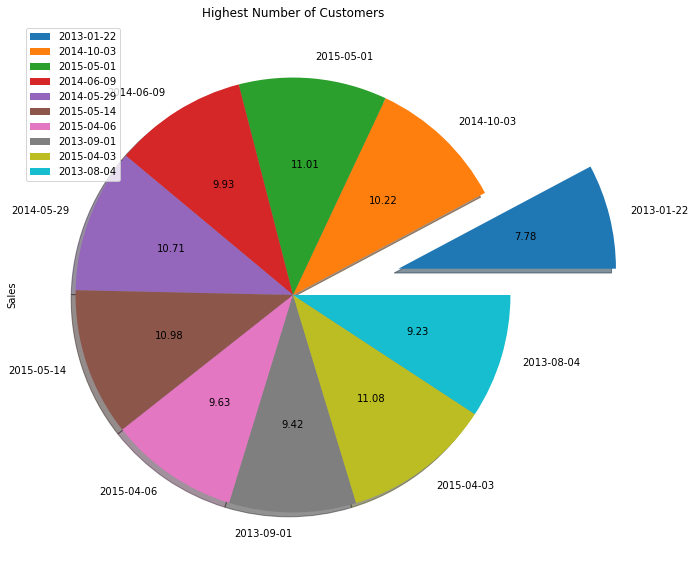

In [27]:
# Use pie chart tool for visualising data
# Convert datetime to string to show date only

separate = [0.5,0,0,0,0,0,0,0,0,0]

customers10.plot(y="Sales", kind="pie", figsize=(20,10), title="Highest Number of Customers",
                 labels=customers10["Date"].dt.strftime('%Y-%m-%d'),autopct="%.2f",shadow=True
                ,explode=separate)
plt.show()

##### All the sales for store 1, store 25 and store 827 that occurred in December of 2014

In [28]:
# Filter stores of December 2014 based on conditions 

stores_Dec = nan_merged[(nan_merged['month'] == 12) & (nan_merged['year'] == 2014) & ((nan_merged['Store'] == 1)
                        |(nan_merged['Store'] == 25)|(nan_merged['Store'] == 827)) ]
stores_Dec

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
212,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2014-12-31,2605,327,1,0,0,1,31,12,2014
213,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2014-12-30,6466,703,1,0,0,1,30,12,2014
214,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2014-12-29,6463,700,1,0,0,1,29,12,2014
216,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2014-12-27,6057,684,1,0,0,1,27,12,2014
219,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2014-12-24,3659,421,1,0,0,1,24,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752754,827,a,c,250,1,2005,0,0,0,No Promo2,...,2014-12-05,18708,2213,1,1,0,0,5,12,2014
752755,827,a,c,250,1,2005,0,0,0,No Promo2,...,2014-12-04,16380,1860,1,1,0,0,4,12,2014
752756,827,a,c,250,1,2005,0,0,0,No Promo2,...,2014-12-03,15580,1745,1,1,0,0,3,12,2014
752757,827,a,c,250,1,2005,0,0,0,No Promo2,...,2014-12-02,14347,1665,1,1,0,0,2,12,2014


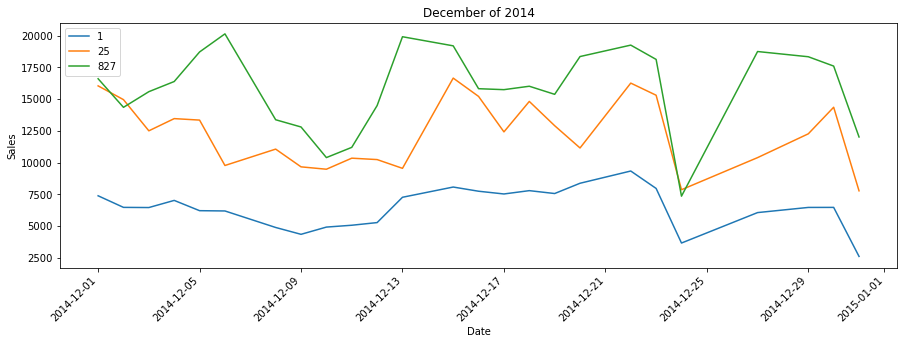

In [29]:
# # Use line graph tool to plot all the sales for store 1, store 25 and store 827

stores_Dec.set_index("Date", inplace=True)
stores_Dec.groupby("Store")["Sales"].plot(kind = "line", figsize=(15,5),rot=45,title = "December of 2014", legend=True)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

##### The first 200 stores from the 23rd to the 27th of December, 2013

In [30]:
# Filter the first 200 stores from the 23rd to the 27th of December 

Stores_200 = nan_merged[nan_merged["Store"] <= 200]
Stores_200

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181033,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-01-07,9714,1208,1,1,0,0,7,1,2013
181035,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-01-05,6383,892,1,0,0,0,5,1,2013
181036,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-01-04,7317,968,1,0,0,1,4,1,2013
181037,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-01-03,6512,845,1,0,0,1,3,1,2013


In [31]:
# Filter 200 stores based on conditions 

Stores_200 = Stores_200[((Stores_200['day']== 23)|(Stores_200['day']== 24)|(Stores_200['day']== 25)|
                        (Stores_200['day']== 26)|(Stores_200['day']== 27))&(Stores_200['month']== 12) 
                        & (Stores_200['year'] == 2013)]
Stores_200

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
581,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2013-12-27,6110,737,1,0,0,1,27,12,2013
584,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2013-12-24,3204,385,1,0,0,1,24,12,2013
585,1,c,a,1270,9,2008,0,0,0,No Promo2,...,2013-12-23,9528,1130,1,0,0,1,23,12,2013
1523,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",...,2013-12-27,5582,659,1,0,0,1,27,12,2013
1526,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",...,2013-12-24,2407,277,1,0,0,1,24,12,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179740,199,d,c,6360,12,2010,1,14,2012,"Mar,Jun,Sept,Dec",...,2013-12-24,4715,447,1,0,0,1,24,12,2013
179741,199,d,c,6360,12,2010,1,14,2012,"Mar,Jun,Sept,Dec",...,2013-12-23,13634,1170,1,0,0,1,23,12,2013
180679,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-12-27,8141,1045,1,0,0,1,27,12,2013
180682,200,a,a,1650,10,2000,0,0,0,No Promo2,...,2013-12-24,5808,747,1,0,0,1,24,12,2013


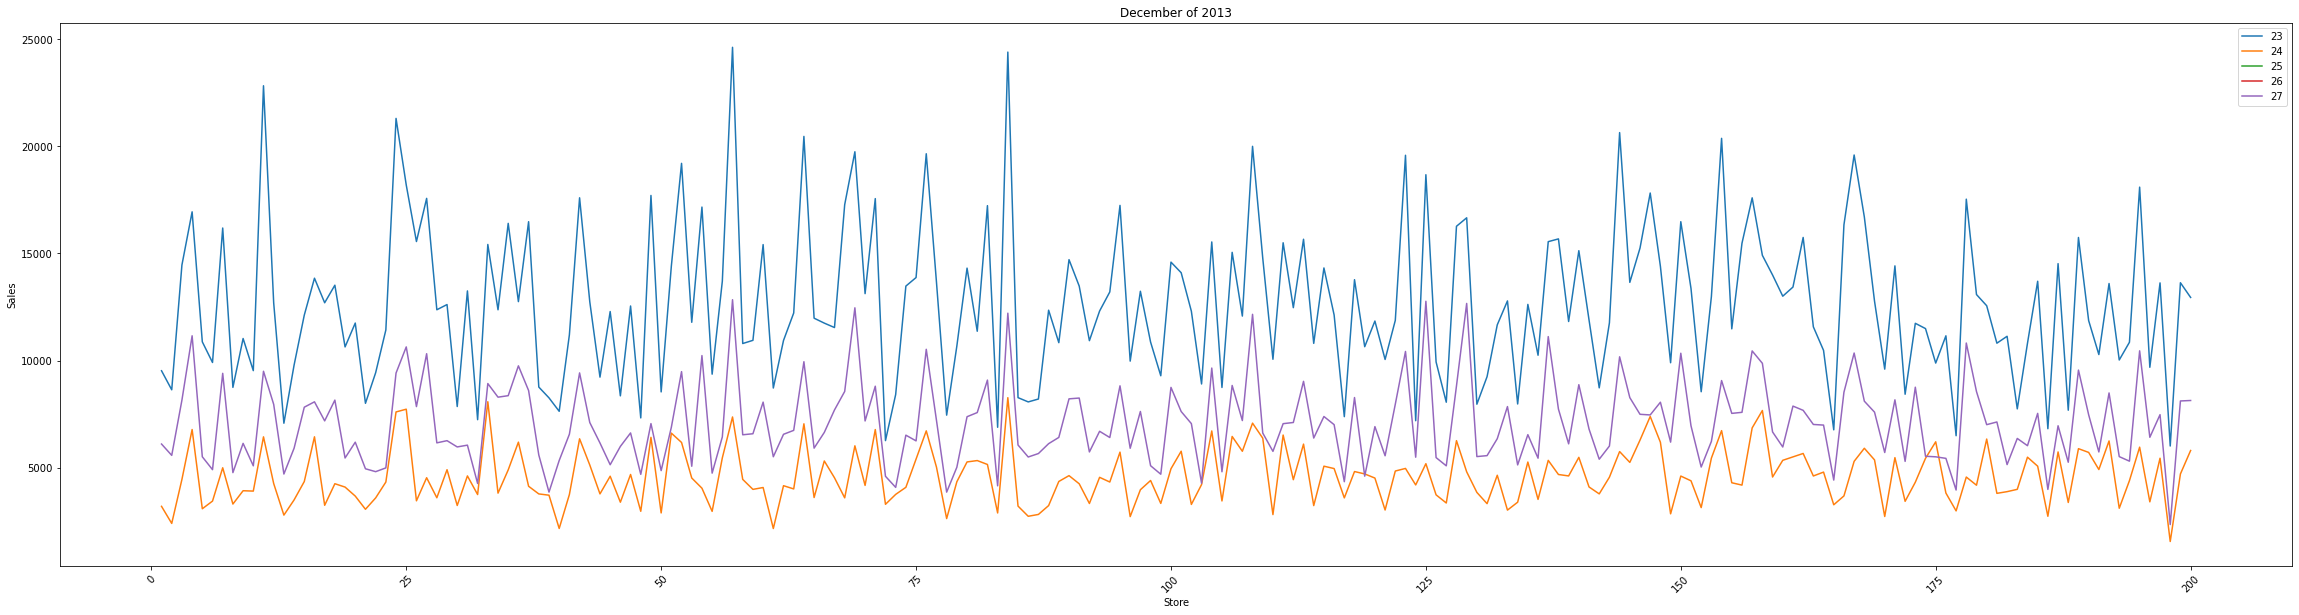

In [32]:
# Use line plot tool to plot sales values of the first 200 stores from the 23rd to the 27th of December, 2013.

Stores_200.set_index("Store", inplace=True)
Stores_200.groupby("day")["Sales"].plot(kind = "line",
                                      figsize=(40,10),rot=45,title = "December of 2013", legend=True)
plt.xlabel("Store")
plt.ylabel("Sales")
plt.show()


### Conclusion

*Dataset Summary*
 
The dataset provides historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. We noticed that some stores in the dataset were temporarily closed for refurbishment. Statistical analyses of sales data can identify reliable associations among the number of customers, different stores, and the date of the sales.

### References

career-resource-center.udacity.com. (n.d.). *Data Science Reports*. [online] Available at: https://career-resource-center.udacity.com/portfolio/data-science-reports.


Halilovic, I. (2021b). *Markdown for Jupyter notebooks cheatsheet.* [online] Medium. Available at: https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed.

Real Python (2018). *Pythonic Data Cleaning With Pandas and NumPy.* [online] Realpython.com. Available at: https://realpython.com/python-data-cleaning-numpy-pandas/.